PCA é uma técnica de redução de dimensionalidade; ele permite destilar dados multidimensionais em menos dimensões, selecionando novas dimensões que preservem a variação nos dados da melhor maneira possível. Não estamos falando de Star Trek aqui; vamos torná-lo real - uma imagem em preto e branco, por exemplo, contém três dimensões de dados: posição X, posição Y e brilho em cada ponto. Destilar isso em duas dimensões pode ser útil para coisas como compressão de imagem e reconhecimento facial, porque destila as informações que mais contribuem para a variação no conjunto de dados. Vamos fazer isso com um exemplo mais simples: o conjunto de dados Iris que acompanha o scikit-learn. É apenas uma pequena coleção de dados que possui quatro dimensões de dados para três tipos diferentes de flores de íris: O comprimento e a largura das pétalas e sépalas de muitas flores individuais de cada espécie. Vamos carregá-lo e dar uma olhada:


In [12]:
from itertools import cycle

# Importa o conjunto de dados Iris da biblioteca sklearn e o PCA (Análise de Componentes Principais)
from sklearn.datasets import load_iris  
from sklearn.decomposition import PCA
import pylab as pl  # Importa o pylab para visualização gráfica

# Carrega o conjunto de dados Iris, que contém dados sobre três tipos de flores
iris = load_iris()

# Extrai o número de amostras (linhas) e o número de características (colunas) dos dados
numSamples, numFeatures = iris.data.shape

# Exibe o número de amostras presentes no conjunto de dados (150 no caso do Iris)
print(numSamples)

# Exibe o número de características (4 no caso: comprimento e largura da sépala e da pétala)
print(numFeatures)

# Exibe a lista de nomes das características no conjunto de dados Iris
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
print(list(iris.feature_names))


150
4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Então, isso nos diz que nosso conjunto de dados contém 150 amostras (flores individuais). Ela tem 4 dimensões - aqui chamadas de características, e três espécies distintas de íris nas quais cada flor é classificada. Embora possamos visualizar 2 ou até 3 dimensões de dados com bastante facilidade, visualizar dados 4D não é algo que nosso cérebro possa fazer. Então, vamos resumir isso em duas dimensões e ver como funciona:

In [13]:
# Atribui os dados do conjunto de dados Iris (sem os rótulos de classe) à variável x
x = iris.data

# Cria um objeto PCA, configurando para reduzir as dimensões para 2 componentes principais
# A opção `whiten=True` normaliza as componentes principais para ter variância unitária
pca = PCA(n_components=2, whiten=True).fit(x)

# Aplica a transformação PCA nos dados, reduzindo as dimensões de 4 para 2
X_pca = pca.transform(x)


O que fizemos foi destilar nossos dados 4D em 2D, projetando-os em dois vetores 4D ortogonais que constituem a base de nossa nova projeção 2D. Podemos ver o que são esses vetores 4D, embora não seja algo que você possa realmente entender:

In [14]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [15]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648]
0.977685206318798


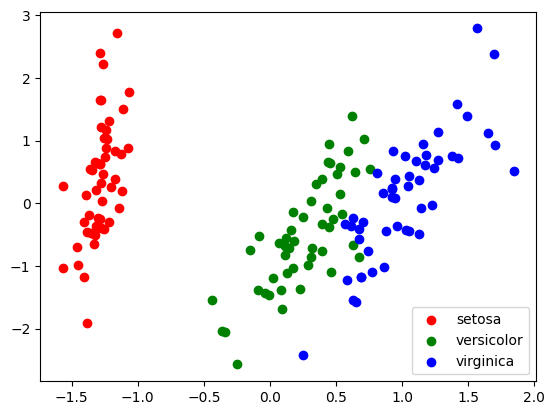

In [16]:
# Diretiva mágica específica para notebooks Jupyter que exibe os gráficos no próprio notebook
%matplotlib inline

# Importa todas as funções e bibliotecas necessárias do pylab (similar a matplotlib)
from pylab import *
from itertools import cycle  

# Gera um ciclo de cores 'r' (vermelho), 'g' (verde) e 'b' (azul)
colors = cycle('rgb')

# Define o range das classes-alvo (0, 1 e 2 para as 3 espécies de flores)
target_ids = range(len(iris.target_names))

# Cria uma nova figura
pl.figure()

# Itera sobre as três classes de flores (0, 1, 2), suas cores e rótulos
for i, c, label in zip(target_ids, colors, iris.target_names):
    # Plota um gráfico de dispersão para cada classe, selecionando as amostras daquela classe
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1],
        c=c, label=label)

# Exibe a legenda com os nomes das classes
pl.legend()

# Mostra o gráfico
pl.show()


Você pode ver que os três tipos diferentes de íris ainda estão muito bem agrupados. Se você pensar bem, isso provavelmente funciona bem porque o tamanho geral de uma flor individual provavelmente faz com que os tamanhos das pétalas e das sépalas aumentem na mesma proporção. Embora os números reais neste gráfico não tenham um significado intuitivo, o que provavelmente estamos vendo é a medida da proporção entre largura e altura de pétalas e sépalas - e o PCA destilou nossos dados até isso por si só.

## Activity
Nossos resultados sugerem que poderíamos realmente destilar esses dados em uma única dimensão e ainda preservar a maior parte de sua variância. Experimente! Faça um PCA até um componente e meça os resultados.


In [17]:
from sklearn.decomposition import PCA

# Atribui os dados do conjunto de dados Iris (sem os rótulos de classe) à variável x
x = iris.data

# Cria um objeto PCA configurado para reduzir as dimensões para 1 componente principal
pca = PCA(n_components=1, whiten=True).fit(x)

# Aplica a transformação PCA nos dados, reduzindo as dimensões de 4 para 1
X_pca_1d = pca.transform(x)

# Exibe a porcentagem da variância explicada pelo único componente principal
print(f"Variância explicada pelo único componente principal: {pca.explained_variance_ratio_[0] * 100:.2f}%")


Variância explicada pelo único componente principal: 92.46%


In [18]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]]


In [19]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872]
0.9246187232017341


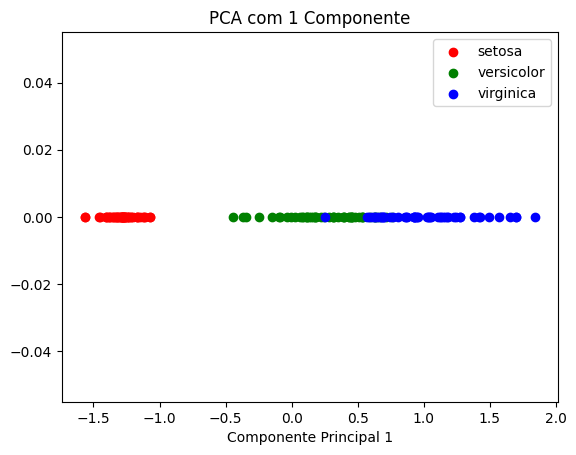

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from itertools import cycle

# Gera um ciclo de cores 'r' (vermelho), 'g' (verde) e 'b' (azul)
colors = cycle('rgb')

# Define o range das classes-alvo (0, 1 e 2 para as 3 espécies de flores)
target_ids = range(len(iris.target_names))

# Cria um gráfico de barras para cada classe em uma única dimensão
plt.figure()

for i, c, label in zip(target_ids, colors, iris.target_names):
    # Plota as amostras de cada classe ao longo da única dimensão PCA
    plt.scatter(X_pca_1d[iris.target == i], [0] * sum(iris.target == i), 
                c=c, label=label)

# Exibe a legenda com os nomes das classes
plt.legend()

# Adiciona rótulos e título
plt.xlabel('Componente Principal 1')
plt.title('PCA com 1 Componente')

# Mostra o gráfico
plt.show()


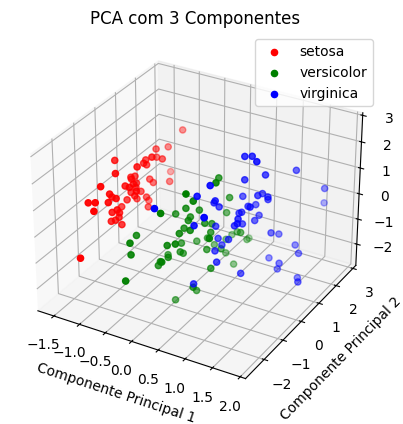

Variância explicada pelos três componentes principais: 99.48%


In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle

# Atribui os dados do conjunto de dados Iris (sem os rótulos de classe) à variável x
x = iris.data

# Aplica PCA para reduzir para 3 componentes principais
pca = PCA(n_components=3, whiten=True).fit(x)
X_pca_3d = pca.transform(x)

# Gera um ciclo de cores 'r' (vermelho), 'g' (verde) e 'b' (azul)
colors = cycle('rgb')

# Define o range das classes-alvo (0, 1 e 2 para as 3 espécies de flores)
target_ids = range(len(iris.target_names))

# Cria uma figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Itera sobre as três classes de flores (0, 1, 2), suas cores e rótulos
for i, c, label in zip(target_ids, colors, iris.target_names):
    # Plota um gráfico de dispersão 3D para cada classe, selecionando as amostras daquela classe
    ax.scatter(X_pca_3d[iris.target == i, 0], X_pca_3d[iris.target == i, 1], X_pca_3d[iris.target == i, 2],
               c=c, label=label)

# Exibe a legenda com os nomes das classes
ax.legend()

# Adiciona rótulos e título
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.title('PCA com 3 Componentes')

# Mostra o gráfico
plt.show()

# Exibe a variância explicada pelos três componentes principais
variancia_explicada = pca.explained_variance_ratio_.sum() * 100
print(f"Variância explicada pelos três componentes principais: {variancia_explicada:.2f}%")
